In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report, hinge_loss

In [2]:
ROOT_DIR = os.path.normpath(os.path.join(os.path.dirname(os.path.realpath('__file__'))))
DATA_LOAD_DIR = os.path.abspath('/data/aumkar/data_load')

In [3]:
x = []
y = []

for i in range(150):
    
    print('Data set: ', i)
    
    data = np.load(os.path.join(DATA_LOAD_DIR, 'inception', 'feat_incept_%s.npz' % i))
    label = np.load(os.path.join(DATA_LOAD_DIR, 'inception', 'feat_incept_label_%s.npz' % i))
    
    x.append(data['a'])
    y.append(label['a'])

('Data set: ', 0)
('Data set: ', 1)
('Data set: ', 2)
('Data set: ', 3)
('Data set: ', 4)
('Data set: ', 5)
('Data set: ', 6)
('Data set: ', 7)
('Data set: ', 8)
('Data set: ', 9)
('Data set: ', 10)
('Data set: ', 11)
('Data set: ', 12)
('Data set: ', 13)
('Data set: ', 14)
('Data set: ', 15)
('Data set: ', 16)
('Data set: ', 17)
('Data set: ', 18)
('Data set: ', 19)
('Data set: ', 20)
('Data set: ', 21)
('Data set: ', 22)
('Data set: ', 23)
('Data set: ', 24)
('Data set: ', 25)
('Data set: ', 26)
('Data set: ', 27)
('Data set: ', 28)
('Data set: ', 29)
('Data set: ', 30)
('Data set: ', 31)
('Data set: ', 32)
('Data set: ', 33)
('Data set: ', 34)
('Data set: ', 35)
('Data set: ', 36)
('Data set: ', 37)
('Data set: ', 38)
('Data set: ', 39)
('Data set: ', 40)
('Data set: ', 41)
('Data set: ', 42)
('Data set: ', 43)
('Data set: ', 44)
('Data set: ', 45)
('Data set: ', 46)
('Data set: ', 47)
('Data set: ', 48)
('Data set: ', 49)
('Data set: ', 50)
('Data set: ', 51)
('Data set: ', 52)
('D

In [4]:
x_t = []
y_t = []

for i in range(50, 70):
    
    print('Target data set: ', i)
    
    data_target = np.load(os.path.join(DATA_LOAD_DIR, 'inception', 'feat_incept_target_%s.npz' % i))
    pseudo_label = np.load(os.path.join(DATA_LOAD_DIR, 'inception_predictions', 'incept_pred_%s.npz' % i))
    
    x_t.append(data_target['a'])
    y_t.append(pseudo_label['a'])

('Target data set: ', 50)
('Target data set: ', 51)
('Target data set: ', 52)
('Target data set: ', 53)
('Target data set: ', 54)
('Target data set: ', 55)
('Target data set: ', 56)
('Target data set: ', 57)
('Target data set: ', 58)
('Target data set: ', 59)
('Target data set: ', 60)
('Target data set: ', 61)
('Target data set: ', 62)
('Target data set: ', 63)
('Target data set: ', 64)
('Target data set: ', 65)
('Target data set: ', 66)
('Target data set: ', 67)
('Target data set: ', 68)
('Target data set: ', 69)


In [5]:
def lst2arr_reshape(lst, data):
    
    arr = np.asarray(lst)
    
    if data == 'data':
        return arr.reshape((arr.shape[0] * arr.shape[1], arr.shape[2]))
    elif data == 'label':
        return arr.reshape((arr.shape[0] * arr.shape[1]))

In [6]:
xsource = lst2arr_reshape(x, 'data')
ysource = lst2arr_reshape(y, 'label')
xtarget = lst2arr_reshape(x_t, 'data')
ytarget = lst2arr_reshape(y_t, 'label')

In [7]:
(xsource.shape, ysource.shape)

((9600, 51200), (9600,))

In [8]:
(np.unique(ysource), np.unique(ytarget))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [9]:
clf = linear_model.SGDClassifier(max_iter = 1000, tol = 1e-3, n_jobs = -1, class_weight = 'balanced')

In [10]:
def single_sslda(sourcex, sourcey, targetx, targety, M):
    
    score = []
    loss = []

    for i in range(1, M):
        
        print('Iteration: ', i)
         
        n = (i / float(M)) * len(targetx)
        
        idx = np.arange(len(targetx))
        np.random.shuffle(idx)
        
        sampled_idxs = idx[:int(n)]
        target_sample = targetx[sampled_idxs]
        
        if i == 1:
            target_label = targety[sampled_idxs]
        else:
            target_label = pred[sampled_idxs]
        
        concat_sample = np.append(sourcex, target_sample, axis = 0)
        concat_label = np.append(sourcey, target_label, axis = 0)

        clf.fit(concat_sample, concat_label)
        
        print('Predicting for iteration: ', i)
        pred = clf.predict(targetx)
        
        score.append(clf.score(targetx, targety))
        loss.append(hinge_loss(targety, clf.decision_function(targetx)))
        
    return pred, score, loss

In [11]:
pred = []
mean_acc = []
loss_ = []

for i in range(3):
    
    print('ENSEMBLE ITERATION: ', i+1)
    
    sslda_pred, acc, svmloss = single_sslda(xsource, ysource, xtarget, ytarget, 10)
    
    pred.append(sslda_pred)
    mean_acc.append(acc)
    loss_.append(svmloss)

('ENSEMBLE ITERATION: ', 1)
('Iteration: ', 1)
('Predicting for iteration: ', 1)
('Iteration: ', 2)
('Predicting for iteration: ', 2)
('Iteration: ', 3)
('Predicting for iteration: ', 3)
('Iteration: ', 4)
('Predicting for iteration: ', 4)
('Iteration: ', 5)
('Predicting for iteration: ', 5)
('Iteration: ', 6)
('Predicting for iteration: ', 6)
('Iteration: ', 7)
('Predicting for iteration: ', 7)
('Iteration: ', 8)
('Predicting for iteration: ', 8)
('Iteration: ', 9)
('Predicting for iteration: ', 9)
('ENSEMBLE ITERATION: ', 2)
('Iteration: ', 1)
('Predicting for iteration: ', 1)
('Iteration: ', 2)
('Predicting for iteration: ', 2)
('Iteration: ', 3)
('Predicting for iteration: ', 3)
('Iteration: ', 4)
('Predicting for iteration: ', 4)
('Iteration: ', 5)
('Predicting for iteration: ', 5)
('Iteration: ', 6)
('Predicting for iteration: ', 6)
('Iteration: ', 7)
('Predicting for iteration: ', 7)
('Iteration: ', 8)
('Predicting for iteration: ', 8)
('Iteration: ', 9)
('Predicting for iterati

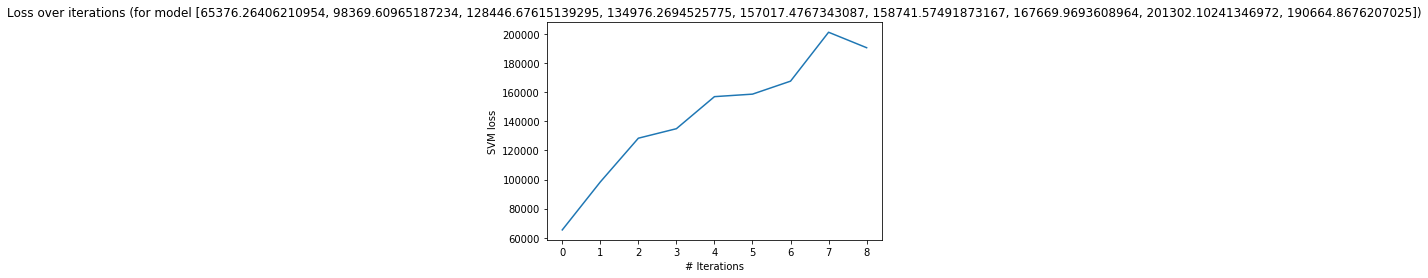

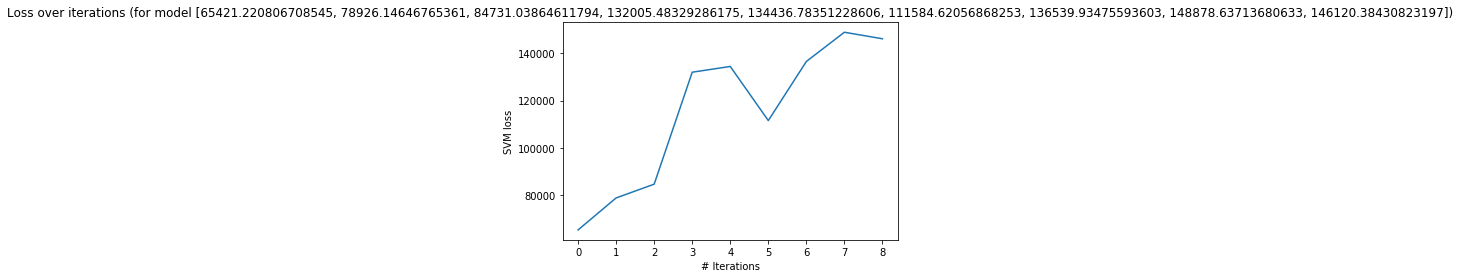

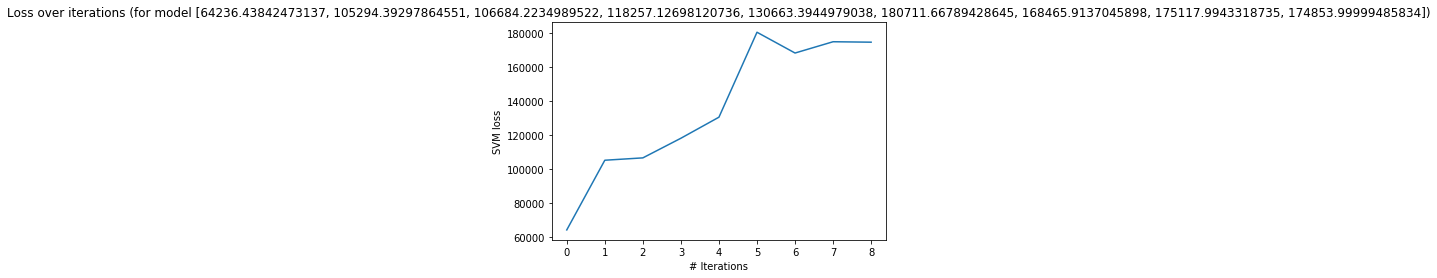

In [12]:
for i in loss_:
    plt.figure()
    plt.plot(i)
    plt.title('Loss over iterations (for model %s)' % i)
    plt.xlabel('# Iterations')
    plt.ylabel('SVM loss')
    plt.show()

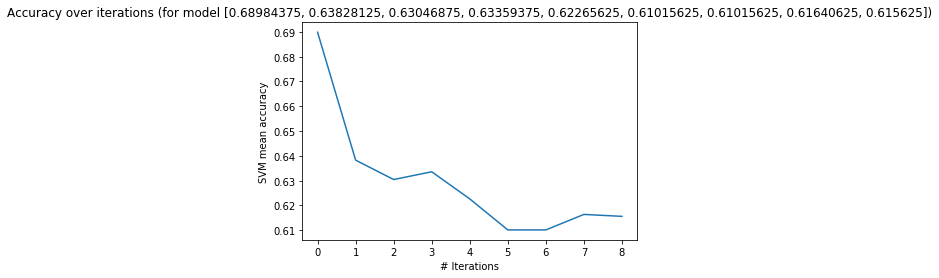

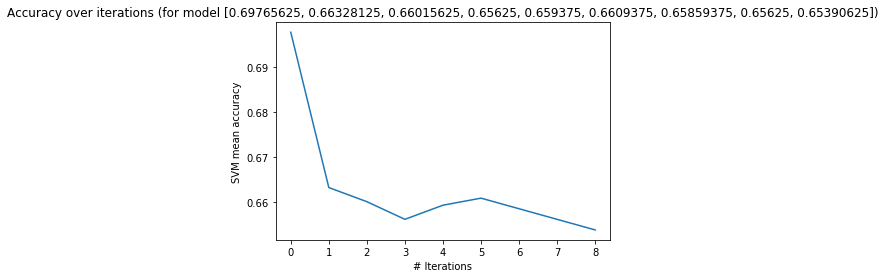

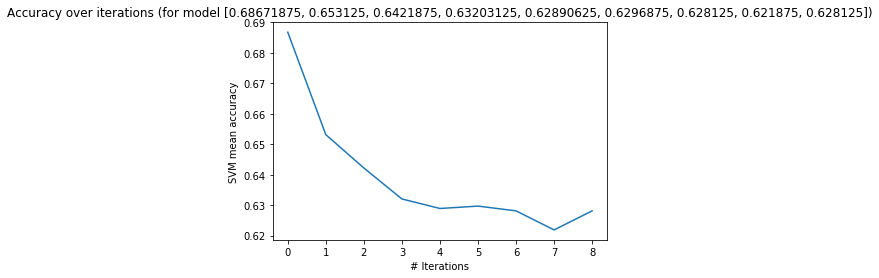

In [13]:
for i in mean_acc:
    plt.figure()
    plt.plot(i)
    plt.title('Accuracy over iterations (for model %s)' % i)
    plt.xlabel('# Iterations')
    plt.ylabel('SVM mean accuracy')
    plt.show()

In [14]:
classes = ['aeroplane', 'bicycle', 'bus', 'car', 'horse', 'knife', 'motorcycle', 'person', 'plant', 'skateboard', 
          'train', 'truck']

In [15]:
for i in pred:
    print(classification_report(ytarget, i, target_names = classes))

              precision    recall  f1-score   support

   aeroplane       0.70      0.47      0.56        15
     bicycle       0.57      0.11      0.18        37
         bus       0.38      0.35      0.36       152
         car       0.72      0.66      0.69       437
       horse       0.00      0.00      0.00         2
       knife       0.00      0.00      0.00         3
  motorcycle       0.68      0.84      0.75       452
      person       0.00      0.00      0.00         1
       plant       1.00      0.12      0.22        16
  skateboard       0.50      0.15      0.23        27
       train       0.30      0.37      0.33       115
       truck       0.54      0.30      0.39        23

   micro avg       0.62      0.62      0.62      1280
   macro avg       0.45      0.28      0.31      1280
weighted avg       0.62      0.62      0.60      1280

              precision    recall  f1-score   support

   aeroplane       1.00      0.47      0.64        15
     bicycle       0.50 

/home/aumkar/anaconda3/envs/daenv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
majority_vote = np.maximum.reduce([pred[0], pred[1], pred[2]])

In [18]:
majority_vote

array([ 3, 10,  6, ...,  6,  6,  3])

In [19]:
print(classification_report(ytarget, majority_vote, target_names = classes))

              precision    recall  f1-score   support

   aeroplane       1.00      0.40      0.57        15
     bicycle       0.67      0.05      0.10        37
         bus       0.44      0.26      0.33       152
         car       0.73      0.63      0.67       437
       horse       0.00      0.00      0.00         2
       knife       0.00      0.00      0.00         3
  motorcycle       0.67      0.85      0.75       452
      person       0.00      0.00      0.00         1
       plant       0.75      0.19      0.30        16
  skateboard       0.40      0.15      0.22        27
       train       0.34      0.57      0.42       115
       truck       0.45      0.39      0.42        23

   micro avg       0.61      0.61      0.61      1280
   macro avg       0.45      0.29      0.31      1280
weighted avg       0.62      0.61      0.60      1280

